In [1]:
#Importing Dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#Data collection and Analysis
big_mart_data = pd.read_csv(r"C:\data_science_datasets\Train.csv")
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#first 5 rows of dataset
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#number of data points & number of features
big_mart_data.shape

(8523, 12)

In [5]:
#getting informations about the datasets
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type 

In [6]:
#checking for missing values
big_mart_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Handling the missing values

Mean --> Average Value
Mode --> Most Repeated value

In [7]:
#mean value of "Item_Weight"column 
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [8]:
#filling the missing value in "Item_Weight" column with "mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\3981139645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)


In [9]:
big_mart_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing value in 'Outlet_Size' with 'Mode'

In [10]:
mode_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [13]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet_size)

In [15]:
big_mart_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [16]:
#statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [17]:
sns.set()

C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\4140005854.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


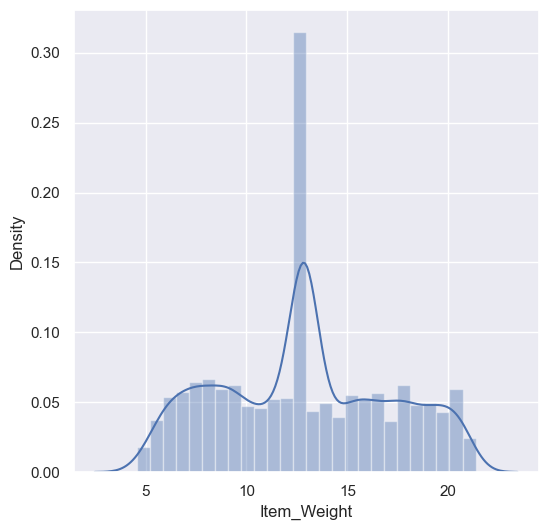

In [18]:
#Item_weight_Distribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\3528440325.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


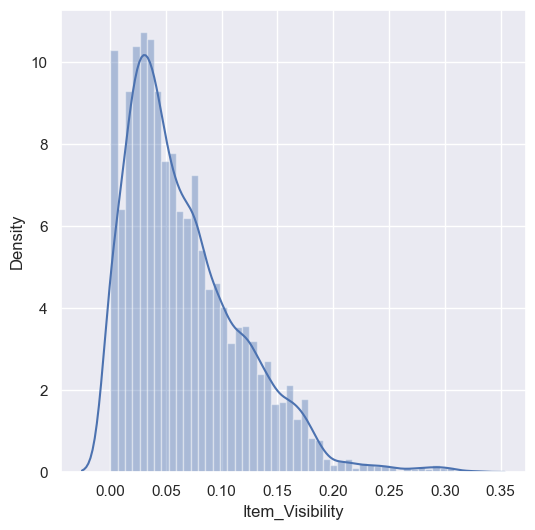

In [19]:
#Item_visibility_Distribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\1155843580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


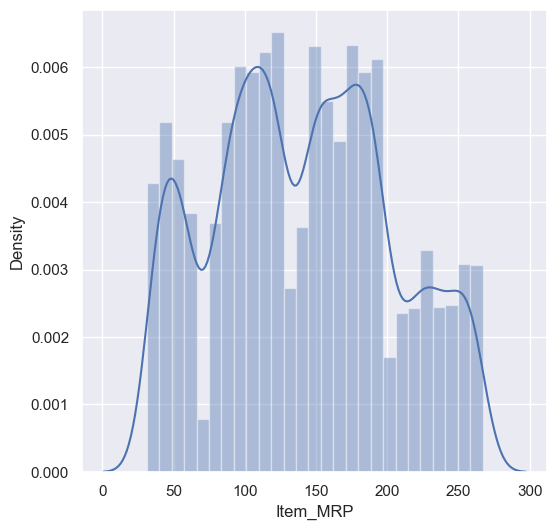

In [20]:
#Item_Mrp_Distribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\1847194863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


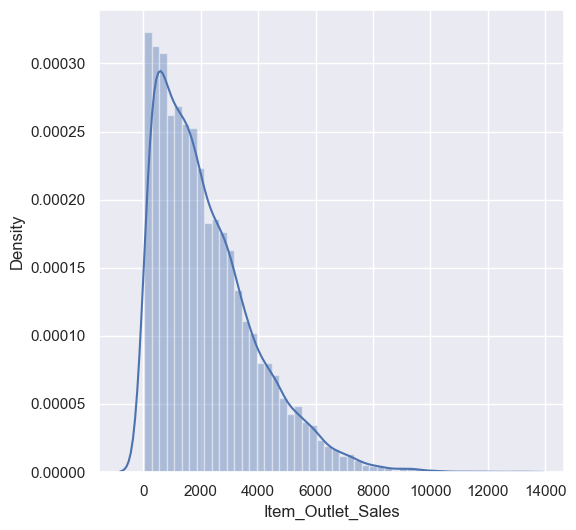

In [21]:
#Item_Outlet_Sales_Distribution 
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

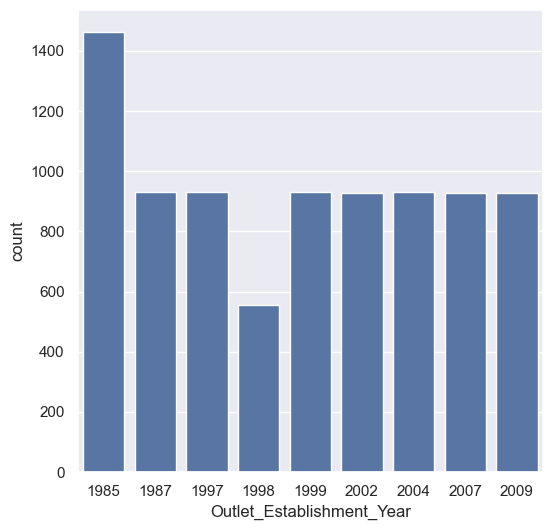

In [22]:
#Outlet_Establishment_Year  column

plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Establishment_Year',data = big_mart_data)
plt.show()

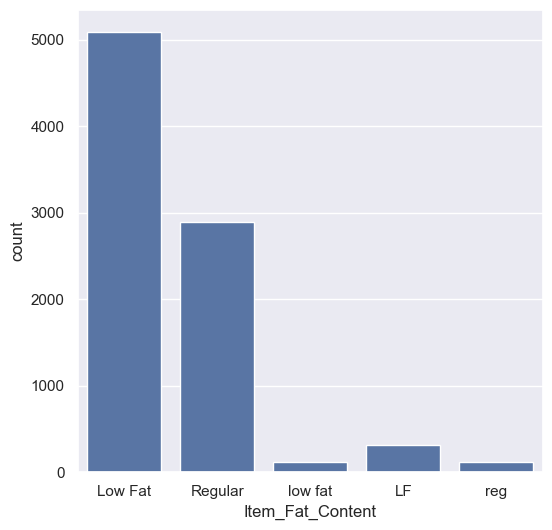

In [23]:
#Item_Fat_Content column

plt.figure(figsize=(6,6))
sns.countplot(x ='Item_Fat_Content',data = big_mart_data)
plt.show()

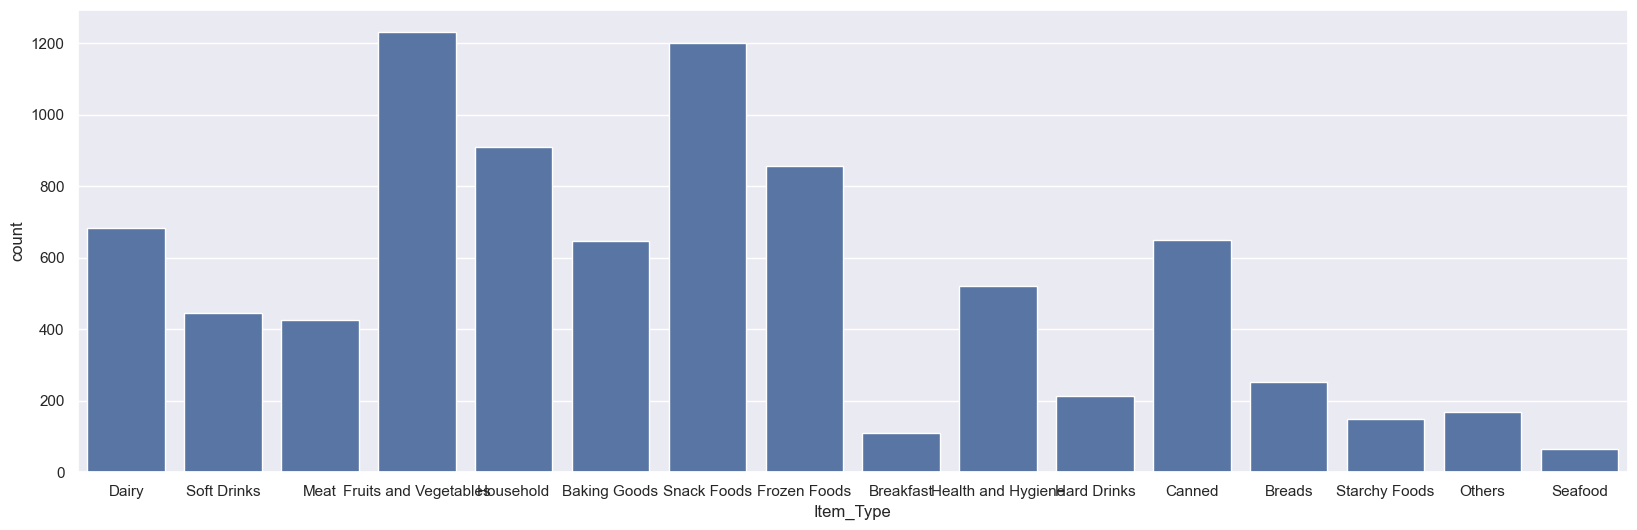

In [24]:
#Item_Type   column

plt.figure(figsize=(20,6))
sns.countplot(x ='Item_Type',data = big_mart_data)
plt.show()

In [26]:
print(big_mart_data['Outlet_Size'].head())
print(big_mart_data['Outlet_Size'].dtype)
print(big_mart_data['Outlet_Size'].isnull().sum())


0                                               Medium
1                                               Medium
2                                               Medium
3    Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                 High
Name: Outlet_Size, dtype: object
object
0


In [31]:
# Check if the column exists and is valid
print("Columns in DataFrame:", big_mart_data.columns)
print("\nType of Outlet_Size:", type(big_mart_data['Outlet_Size']))
print("\nSample values:\n", big_mart_data['Outlet_Size'].head())
print("\nMissing values in Outlet_Size:", big_mart_data['Outlet_Size'].isnull().sum())


Columns in DataFrame: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Type of Outlet_Size: <class 'pandas.core.series.Series'>

Sample values:
 0                                               Medium
1                                               Medium
2                                               Medium
3    Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                 High
Name: Outlet_Size, dtype: object

Missing values in Outlet_Size: 0


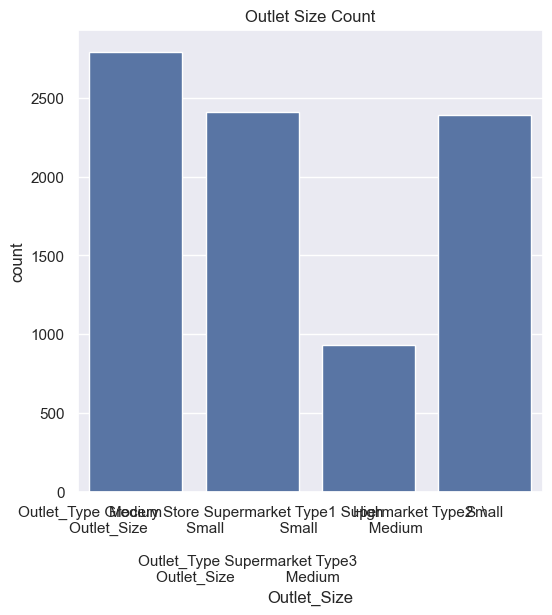

In [32]:
# Ensure you're working with a clean Series
outlet_data = big_mart_data.copy()
outlet_data['Outlet_Size'] = outlet_data['Outlet_Size'].astype(str).fillna('Unknown')

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=outlet_data)
plt.title("Outlet Size Count")
plt.show()


In [33]:
# Define allowed values
valid_outlet_sizes = ['Small', 'Medium', 'High', 'Unknown']

# Optionally convert everything to string in case of type mismatch
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].astype(str)

# Clean out rows with obviously invalid values
big_mart_data = big_mart_data[big_mart_data['Outlet_Size'].isin(valid_outlet_sizes)]


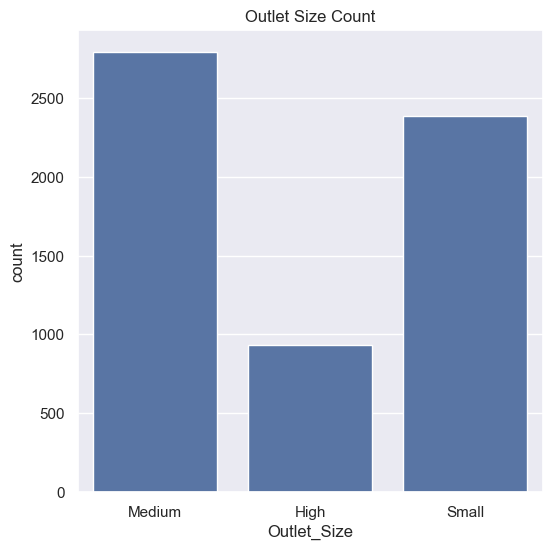

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.title("Outlet Size Count")
plt.show()


Data Pre-Processing

In [35]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [36]:
big_mart_data ['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: count, dtype: int64

In [38]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace = True)

C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\3190362164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace = True)


In [39]:
big_mart_data ['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3955
Regular    2158
Name: count, dtype: int64

Label Enocoding

In [40]:
encoder = LabelEncoder()

In [42]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\184603885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\184603885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
C:\Users\ashif\AppData\Local\Temp\ipykernel_5036\184603885.py:5: SettingWithCopyWarning: 
A value is tryin

In [43]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155,9.300,0,0.016047,4,249.8092,6,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,1,2009,1,2,2,443.4228
2,661,17.500,0,0.016760,10,141.6180,6,1999,1,0,1,2097.2700
4,1294,8.930,0,0.000000,9,53.8614,0,1987,0,2,1,994.7052
5,757,10.395,1,0.000000,0,51.4008,1,2009,1,2,2,556.6088


Splitting Features and Target

In [44]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [47]:
print(X)


      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 155        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 661       17.500                 0         0.016760   
4                1294        8.930                 0         0.000000   
5                 757       10.395                 1         0.000000   
...               ...          ...               ...              ...   
8517              388       20.750                 1         0.083607   
8518              369        6.865                 0         0.056783   
8520             1354       10.600                 0         0.035186   
8521              680        7.210                 1         0.145221   
8522               49       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  6    

In [48]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 6113, dtype: float64


Splitting the Data into  Training Data and Testing Data

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(6113, 11) (4890, 11) (1223, 11)


Machine Learning Model Training

XGBOOST Regressor

In [50]:
regressor = XGBRegressor()

In [51]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [52]:
#Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [54]:
#R squared Value 
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [57]:
print('R squared value:',r2_train)

R squared value: 0.9086912858115259


In [58]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [60]:
#R squared Value 
r2_test = metrics.r2_score(Y_test,test_data_prediction)

In [61]:
print('R squared value:',r2_test)

R squared value: 0.49197636430483005


In [62]:
def adjusted_r2_score(r2,n,p):
    return 1-(1-r2) * ((n - 1) /(n - p - 1))

n = X_test.shape[0]
p = X_test.shape[1]

adj_r2_test = adjusted_r2_score(r2_test,n,p)

print("Adjusted r2 on test data:",adj_r2_test)

Adjusted r2 on test data: 0.487361781321637


In [63]:

def adjusted_r2_score(r2,n,p):
    return 1-(1-r2) * ((n - 1) /(n - p - 1))

n = X_train.shape[0]
p = X_train.shape[1]

adj_r2_train = adjusted_r2_score(r2_train,n,p)

print("Adjusted r2 on train data:",adj_r2_train)

Adjusted r2 on train data: 0.9084853826019988


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [67]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor()
model.fit(X_train_scaled,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [68]:
r2_train = model.score(X_train_scaled,Y_train)
r2_test = model.score(X_test_scaled,Y_test)

In [69]:
def adjusted_r2_score(r2,n,p):
    return 1-(1-r2) * ((n - 1) /(n - p - 1))

n_train, p = X_train_scaled.shape
n_test = X_test_scaled.shape[0]

adj_r2_train = adjusted_r2_score(r2_train,n_train,p)
adj_r2_test = adjusted_r2_score(r2_test,n_test,p)

In [70]:
print("Adjusted R2 on train data:",adj_r2_train)
print("Adjusted R2 on test data:",adj_r2_test)

Adjusted R2 on train data: 0.9084853826019988
Adjusted R2 on test data: 0.487361781321637


In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'reg_alpha': [0, 0.5, 1],     # L1 regularization
    'reg_lambda': [1, 1.5, 2]     # L2 regularization
}

# Define the base model
xgb = XGBRegressor()

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, Y_train)

# Best model after tuning
best_model = grid_search.best_estimator_

# Evaluate
r2_train = best_model.score(X_train_scaled, Y_train)
r2_test = best_model.score(X_test_scaled, Y_test)

# Adjusted R2 function
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

n_train, p = X_train_scaled.shape
n_test = X_test_scaled.shape[0]

adj_r2_train = adjusted_r2_score(r2_train, n_train, p)
adj_r2_test = adjusted_r2_score(r2_test, n_test, p)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Adjusted R2 on train data:", adj_r2_train)
print("Adjusted R2 on test data:", adj_r2_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 2}
Adjusted R2 on train data: 0.609814494712987
Adjusted R2 on test data: 0.5924925140758814
